## Titanic Exploratory Data Analytics, Machine Learning Model Tuning and Evaluations

This work spawned from the legendary Kaggle - Titanic competition. The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck based on the dataset provided. This workbook provides data wrangling, feature engineering, model comparisons and selection with alternative approaches compared along the way. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 68% of the passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Specifically, the women, children and upper-class passengers. 
 - This exercise is a supervised learning classification problem. 

Supervised learning describes a type of problem that involves using a model to learn a mapping between input examples and the target variable. 
 - Applications in which the training data comprises examples of the input vectors along with their corresponding target vectors are known as supervised learning problems. 
  - Page 3, Pattern Recognition and Machine Learning, 2006.

Models are fit on training data comprised of inputs and outputs and used to make predictions on test sets where only the inputs are provided and the outputs from the model are compared to the withheld target variables and used to estimate the skill of the model.
 - Learning is a search through the space of possible hypotheses for one that will perform well, even on new examples beyond the training set. To measure the accuracy of a hypothesis we give it a test set of examples that are distinct from the training set.
  - Page 695, Artificial Intelligence: A Modern Approach, 3rd edition, 2015.

There are two main types of supervised learning problems:
 - Classification: Supervised learning problem that involves predicting a class label.
 - Regression: Supervised learning problem that involves predicting a numerical label.
 
Supervised learning quotes from Jason Brownlee's site referenced in Inspirations section.

<h1></span> Outline:</h1>
<ul>
    <li><b><a href="#Phase I">Phase I - Data Wrangling and Feature Engineering<a/></b>
        <ul>
            <li><a href="#head-1">Data Wrangling</a>
            <li><a href="#head-2">Feature Engineering</a>  
                <ul>
                    <li><a href="#head-2-1">Create New Features</a>
                    <li><a href="#head-2-2">Correlation Matrix</a>
                </ul>
        </ul>
    <li><b><a href="#Phase II">Phase II - Machine Learning Model Predictions and Comparisons</a></b>
        <ul>
            <li><a href="#prep_ml">ML Model Comparisons</a>
            <li><a href="#ml_models">ROC and K-Fold CV Model Comparison Results</a>
            </ul>

<h1>Phase I - Data Wrangling and Feature Engineering</h1>
<a id="Phase I"></a>

## Begin the Journey ... Load Libraries, Modules, and Data

In [1]:
# Data Exploration
import pandas as pd 
import numpy as np 
from numpy import mean
from numpy import std
np.random.seed(10)
import plotly as py


# machine learning
import sklearn
import xgboost # may need to install
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from xgboost import XGBClassifier

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
print(os.listdir())

['untitled folder', 'EDA_Feat_Eng_ModelEval_Trim.ipynb', 'Machine Learning Model Compare For Kaggle Titanic Dataset.ipynb', 'test.csv', 'submission.csv', 'PreKagA.ipynb', 'KagTitanicSub.csv', 'Kad_EDA_RF_GBM.ipynb', 'train.csv', '.ipynb_checkpoints', 'gender_submission.csv']


##  Data Wrangling <a class="anchor" id="head-1"></a>

In [2]:
#Read csv files
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")
combined = [training, testing] # combined to simplify combined operations to both sets

### We're provided with 12 features in the Train data and 11 in the Test data (Less "Survived" Target Variable)

<ul>
    <li>PassengerId : Passenger Id
    <li>Age : Passenger Age
    <li>Sex : Passenger Sex
    <li>Name : Passenger Name
    <li>Embarked : 
        <ul>
            <li>Southampton
            <li>Cherbourg
            <li>Queenstown
        </ul>
    <li>Parch : Number of Parents/Children Aboard
    <li>SibSp : Number of Siblings/Spouses Aboard
    <li>Fare :  Fare
    <li>Ticket : Ticket Number
    <li>Cabin : Cabin
    <li>Pclass : 
        <ul>
            <li>1 = 1st
            <li>2 = 2nd
            <li>3 = 3rd
        </ul>
    <li>Survived :
        <ul>
            <li>1 for Survived 
            <li>0 for Not-Survived
        </ul>
    </ul>





In [3]:
# View Top Rows
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Review for Nulls / NANs
training.info()   # 3 Features have NANs; 'Age', 'Cabin', 'Embarked' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Review Testing Dataset
testing.info()    # 3 Features with NaNs; 'Age', 'Fare', 'Cabin'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
training.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Palsson, Miss. Stina Viola",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Assess missing data.  

Describe (include = "all") option provides Count, Unique, Top, and Freq info for the 5 object Dtype features: 
Name, Sex, Ticket, Cabin, and Embarked features. Table also provides the quartile statistics for the Int64 and float64 Dtype features. We see that all 891 names are unique, 2 sex classifications, 681 of the 891 tickets are unique for the training dataset. For the Cabin column, 77%-78% are missing. Due to the high unique counts and large percent missing the Name, Ticket, and Cabin fields will be dropped and this is not expected to significantly impact result.

Tables below confirm missing data amounts.



In [7]:
percent_missing = training.isnull().sum() * 100 / len(training)
number_missing = training.isnull().sum()
missing_value_traindf = pd.DataFrame({'column_name': training.columns,
                                 'number_missing' : number_missing,
                                 'percent_missing (%)': percent_missing.round(1)})
print(missing_value_traindf)

             column_name  number_missing  percent_missing (%)
PassengerId  PassengerId               0                  0.0
Survived        Survived               0                  0.0
Pclass            Pclass               0                  0.0
Name                Name               0                  0.0
Sex                  Sex               0                  0.0
Age                  Age             177                 19.9
SibSp              SibSp               0                  0.0
Parch              Parch               0                  0.0
Ticket            Ticket               0                  0.0
Fare                Fare               0                  0.0
Cabin              Cabin             687                 77.1
Embarked        Embarked               2                  0.2


In [8]:
percent_missingTest = testing.isnull().sum() * 100 / len(testing)
number_missingTest = testing.isnull().sum()
missing_valueTest_testdf = pd.DataFrame({'column_name':testing.columns,
                                    'number_missing':number_missingTest,
                                    'percent_missing (%)': percent_missingTest.round(1)})

print(missing_valueTest_testdf)

             column_name  number_missing  percent_missing (%)
PassengerId  PassengerId               0                  0.0
Pclass            Pclass               0                  0.0
Name                Name               0                  0.0
Sex                  Sex               0                  0.0
Age                  Age              86                 20.6
SibSp              SibSp               0                  0.0
Parch              Parch               0                  0.0
Ticket            Ticket               0                  0.0
Fare                Fare               1                  0.2
Cabin              Cabin             327                 78.2
Embarked        Embarked               0                  0.0


### Imputing Missing Data
Machine learning algorithms prefer numeric inputs, as well as, values present for each row and column in a dataset.

- Discarding entire rows and/or columns containing missing values comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data. A popular approach involves statistical methods to calculate a value for a feature column from those values present, then replace the missing values with the calculated statistic.
 - Common statistics include the column: mean, median, mode, or another constant value.

The training cabin variable has 77% missing values and 78% missing in the testing dataset, given most is missing, we'll remove the cabin feature from the data. The training dataset 'Ticket' feature has 681 unique values and will also be removed. For the Embarked column, the most frequent value (mode) is "S" and this will be used to replace the 2 missing values in the training dataset. There is one missing value in the Fare variable of the testing dataset and the median will be used to replace that value.

#### Review distribution of the Age feature to determine best statistic for filling missing data.

<AxesSubplot:xlabel='Age', ylabel='Density'>

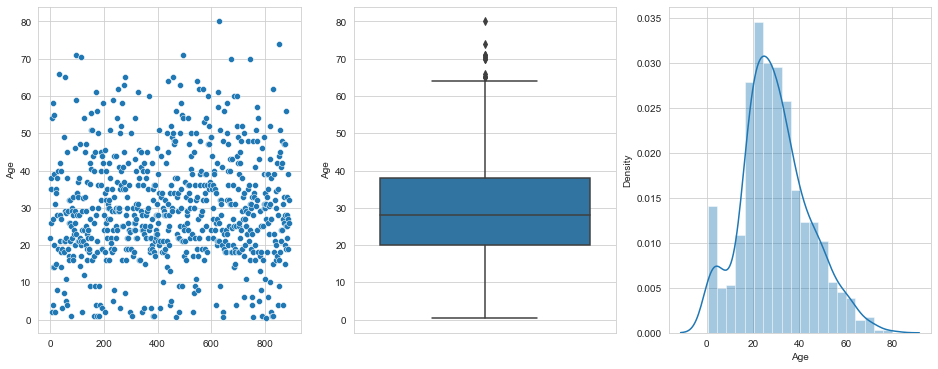

In [9]:
fig, axs = plt.subplots(figsize=[16, 6], ncols=3)
sns.scatterplot(data=training["Age"], ax=axs[0])
sns.boxplot(y=training["Age"], ax=axs[1])
sns.distplot(training["Age"], ax=axs[2])

### Review distribution of the Age feature of Test Dataset to confirm consistent for filling missing data.

<AxesSubplot:xlabel='Age', ylabel='Density'>

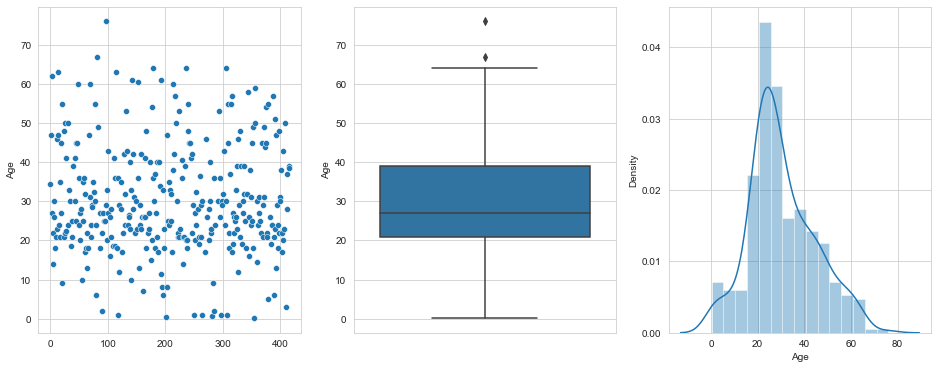

In [10]:
fig, axs = plt.subplots(figsize=[16, 6], ncols=3)
sns.scatterplot(data=testing["Age"], ax=axs[0])
sns.boxplot(y=testing["Age"], ax=axs[1])
sns.distplot(testing["Age"], ax=axs[2])

 - Review of scatterplot, boxplot and distribution plot show the age feature is basically normal with a slight right skew for both the training and testing datasets. Seems reasonable to use the column median (for slight right skew) to replace NaNs.

In [11]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

 - As previously mentioned, we will drop the Cabin and Ticket features. Confirm shape of datasets after Cabin and Ticket features removed.

In [12]:
print("Before", training.shape, testing.shape, combined[0].shape, combined[1].shape)

training = training.drop(['Ticket', 'Cabin'], axis=1)
testing = testing.drop(['Ticket', 'Cabin'], axis=1)
combined = [training, testing]

print("After", training.shape, testing.shape, combined[0].shape, combined[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Convert categorical, strings, to numeric values
 - Let's start with the 'Embarked' and 'Sex' features. Making 'Sex' numeric also introduces a strong correlation between the 'Survived' with 'Sex' features.

In [13]:
combined = [training, testing]

title_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(title_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].astype(int)

In [14]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


### Create Datasets for Variable Importance Checkpoint and Feature Engineering Improvements
We create the Evaluation datasets to compare model accuracy scores at this point in process with the additional feature engineering below to quantify the benefit of additional feature engineering.

In [15]:
TrainEvalData = training
TestEvalData = testing

In [16]:
#Drop non-numeric fields for analysis 
X_train_A = TrainEvalData.drop(["Survived", "Name", "PassengerId"], axis=1)
Y_train_A = TrainEvalData["Survived"]
X_test_A = TestEvalData.drop(["Name", "PassengerId"], axis=1).copy()

X_train_A.shape, Y_train_A.shape, X_test_A.shape

((891, 7), (891,), (418, 7))

##  Feature Engineering <a class="anchor" id="head-2"></a>

## Initial Feature Importance Review (Random Forest) Plot - Checkpoint #1

The feature importance plot describes which features are relevant. It can help with better understanding of the problem and sometimes lead to model improvements. Random Forest classifier is selected for feature importance. The features for internal nodes are selected, which for classification tasks can be gini impurity or infomation gain. We can measure how each feature decreases the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. 

We'll review prior to additional feature engineering tasks for comparison (Checkpoint #1)

Text(0.5, 1.0, 'Feature Importance (Checkpoint 1)')

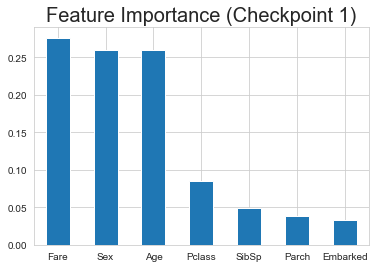

In [17]:
X = X_train_A
y = Y_train_A

# define the model
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
# summarize feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar') # 7 Variables at this point, descending
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Feature Importance (Checkpoint 1)", fontsize=20)

We see that the Fare, Sex, and Age features are relatively close in higher importance and the remaining features ranked less important. We'll compare this to after additional feature engineering is performed. 

### Continue feature engineering on training and testing datasets
Recall the Name field had a title available for viewed records. We can extract to review potential of adding a Title feature.

In [18]:
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(training['Title'], training['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


We'll combine low frequency titles into the created miscellaneous category to simplify along with a few others recategroized.

In [19]:
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Jonkheer"], "Misc")     
    dataset['Title'] = dataset['Title'].replace(["Mlle", "Ms"], "Miss")
    dataset['Title'] = dataset['Title'].replace("Mme", "Mrs")
    dataset['Title'] = dataset['Title'].replace(["Major", "Rev", "Sir"], "Mr")
    # dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
                               
training[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Misc,0.428571
2,Miss,0.702703
3,Mr,0.157795
4,Mrs,0.793651


Text(0.5, 1.0, 'Passenger Title vs Count')

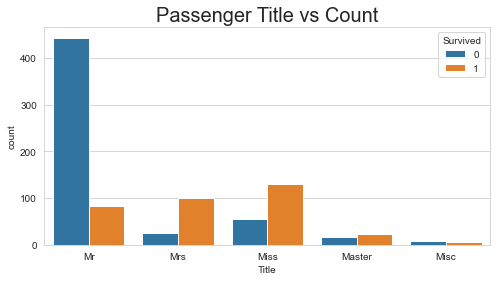

In [20]:
plt.subplots(figsize=(8,4))
sns.countplot(training['Title'], hue=training['Survived'])
plt.title("Passenger Title vs Count", fontsize=20)

Most males with "Mr" title did not survive, but most with Master did. Most female, Mrs and Miss, titles did survive. 


#### Convert the categorical 'Title' to ordinal for our analysis. 

In [21]:
title_ordinal = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_ordinal)
    dataset['Title'] = dataset['Title'].fillna(0)  # Check One hot encoding
    dataset['Title'] = dataset['Title'].astype(int)

#### Now let's drop 'Name' and 'PassengerID' features from training dataset and 'Name' from testing dataset.

In [22]:
training = training.drop(['Name', 'PassengerId'], axis=1)
testing = testing.drop(['Name'], axis=1)
combined = [training, testing]
training.shape, testing.shape

((891, 9), (418, 9))

#### Create Age Bands (Split into 5)

In [23]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].astype(int)

training["AgeBand"] = pd.cut(training["Age"], 5)
training[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [24]:
# AgeBand Beginning Value above changes after swap to integer

for dataset in combined:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3

<AxesSubplot:xlabel='SibSp', ylabel='count'>

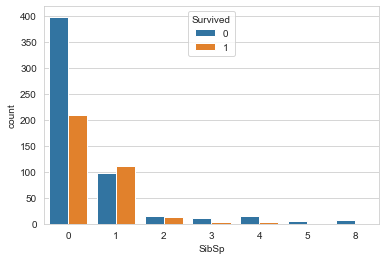

In [25]:
sns.countplot(training['SibSp'],hue=training['Survived'])

 - We see most without Sibling or Spouse (i.e. Alone) perish. 

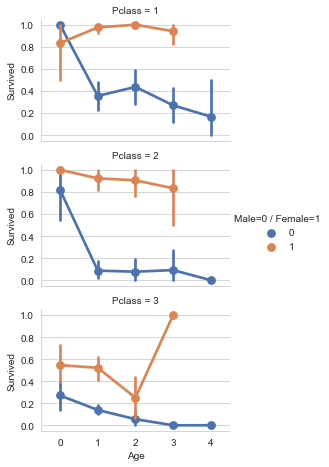

In [26]:
grid = sns.FacetGrid(training, row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Age', 'Survived', 'Sex', palette='deep')
grid.add_legend(title='Male=0 / Female=1')

Women survival higher across all passenger classes and most ages. Men survival higher for First Class compared to Class 2 and Class 3. 

In [27]:
training = training.drop(['AgeBand'], axis=1)
combined = [training, testing]
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


<h1>Create New Features</h1><a id='head-2-1'></a>

 - Let's create new FamilySize feature by combining Parch and SibSP from our datasets and then drop Parch and SibSp. 

In [28]:
for dataset in combined:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
    
training[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Let's compare someone alone to not alone


In [29]:
for dataset in combined:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
training[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let's use IsAlone and drop Parch, SibSp, and FamilySize.

In [30]:
training = training.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
testing = testing.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combined = [training, testing]

training.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


Let's create FareBand similar to AgeBand methodology and categorize per band.

In [31]:
training['FareBand'] = pd.qcut(training['Fare'], 4) # Qcut bins ("FareBand") approx equal populated
training[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [32]:
for dataset in combined:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

training = training.drop(['FareBand'], axis=1)
combined = [training, testing]

### Let's create new Age*PClass Feature

In [33]:
for dataset in combined:
    dataset['Age*PClass'] = dataset.Age * dataset.Pclass
    
training.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*PClass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


<h1>Correlation Matrix</h1><a id='head-2-2'></a>

### Correlations of the training dataset. 
  
Bivariate analysis - tries to find the relationship between two variables. We look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combination of categorical and numerical variables. Pearson's default used assuming Gaussian for numeric & numeric.

Text(0.5, 1.0, 'Correlation Matrix Post Feature Engineering')

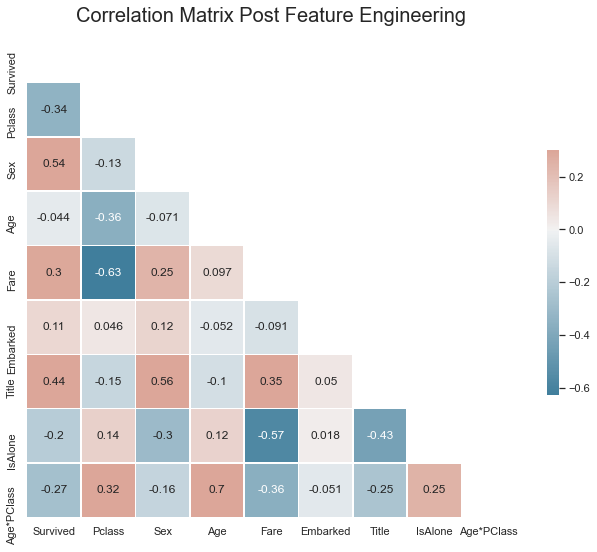

In [34]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = training.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Post Feature Engineering", fontsize=20)

  - We see the "Sex" and the three added features "IsAlone", "Title", and "PClass*Age" have relatively strong correlations

## Variable Importance Plots for Pre and Post Feature Engineering for Comparison

Text(0.5, 1.0, 'Feature Importance (Checkpoint 1)')

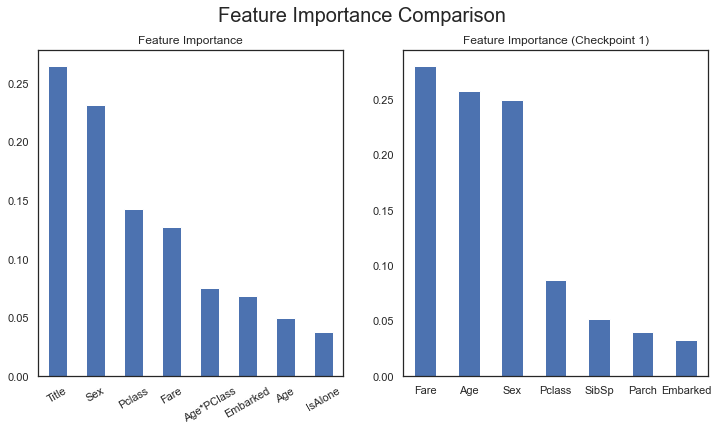

In [35]:
X_train = training.drop("Survived", axis=1)
Y_train = training["Survived"]

X = X_train
y = Y_train

# define the model
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
fig, axs = plt.subplots(figsize=[12, 6], ncols=2)
fig.suptitle('Feature Importance Comparison', fontsize=20)
feat_importances.nlargest(10).plot(kind='bar', rot=30, ax=axs[0], title='Feature Importance') # 8 Variables at this point, descending

# Datasets From Prior Feature Importance Checkpoint
Xa = X_train_A
ya = Y_train_A

modela = RandomForestClassifier()
modela.fit(Xa, ya)
importance = modela.feature_importances_
feat_importances = pd.Series(modela.feature_importances_, index=Xa.columns)
feat_importances.nlargest(10).plot(kind='bar', ax=axs[1]) # 8 Variables at this point, descending
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Feature Importance (Checkpoint 1)", fontsize=12)

 - Feature Importance (Checkpoint 1) was prior to creating the Title, Age*PClass, and IsAlone features and scaling other categorical to numeric. We went from 'Fare', 'Sex', 'Age' features intitally dominating with equal importance to the newly created 'Title' feature then 'Sex', and 'PClass' with decreasing importance. The newly created fields seem important to outcome.

<h1>Phase II - Machine Learning Modeling; Predictions and Comparisons</h1>
<a id="Phase II"></a>

## Model Selection and Evaluation¶

Now we are ready to train models and predict survivability of the test set. There are many predictive modeling algorithms available. Our problem is a supervised binary classification problem. We want to predict a binary output between Survived or Not-Survived using dataset features. Supervised Learning and Binary Classification narrow down model selection. Several are selected below. There are others available.

These include:  
 - Logistic Regression  
 - KNN or k-Nearest Neighbors    
 - Random Forest  
 - Gradient Boosting Machine (GBM)  
 - Extreme Gradient Boosting (XGBoosting)

For intial model comparisons, we'll review confusion matrix and results score using (X_train, y_train) for the training accuracy and (X_val, y_val) for the validation accuracy score leveraging the created validation set.

Cross Validation mean accuracy will be the used as the final model selection criteria.

In [36]:
X_train = training.drop("Survived", axis=1)
y_train = training["Survived"]
X_test = testing.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [37]:
X = X_train
y = y_train

# This creates a validation test dataset from the training data.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

### Logistic Regression
Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_val = round(logreg.score(X_val, y_val) * 100, 2)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dash = '-' * 17
print(dash)
print('LR Confusion Matrix')
print(dash)
print(confusion_matrix(y_val,Y_pred))
print(classification_report(y_val,Y_pred))
print(dash)
# print('LR Accuracy Score (training)')
# print(round((accuracy_score(y_val, Y_pred)*100),2))

print("LR Accuracy score (training): {0:.3f}".format(logreg.score(X_train, y_train)))
print("LR Accuracy score (validation): {0:.3f}".format(logreg.score(X_val, y_val)))

-----------------
LR Confusion Matrix
-----------------
[[90 20]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      0.72      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

-----------------
LR Accuracy score (training): 0.813
LR Accuracy score (validation): 0.782


### K-Nearest Neighbors (kNN)
In pattern recognition, the k-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_val)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_val = round(knn.score(X_val, y_val) * 100, 2)

In [41]:
dash = '-' * 17
print(dash)
print('kNN Confusion Matrix')
print(dash)
print(confusion_matrix(y_val,Y_pred))
print(classification_report(y_val,Y_pred))
print(dash)
print("kNN Accuracy score (training): {0:.3f}".format(knn.score(X_train, y_train)))
print("kNN Accuracy score (validation): {0:.3f}".format(knn.score(X_val, y_val)))

-----------------
kNN Confusion Matrix
-----------------
[[99 11]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

-----------------
kNN Accuracy score (training): 0.851
kNN Accuracy score (validation): 0.816


### Random Forest

Bootstrap aggregating, bagging, involves having each model in the ensemble vote with equal weight. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set. As an example, the random forest algorithm combines random decision trees with bagging to achieve very high classification accuracy. In bagging the samples are generated in such a way that the samples are different from each other however replacement is allowed. Random forests are an ensemble learning method for classification, regression and other tasks like variable importance, etc.

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_val = round(random_forest.score(X_val, y_val) * 100, 2)

In [43]:

print(dash)
print('RF Confusion Matrix')
print(dash)
print(confusion_matrix(y_val,Y_pred))
print(classification_report(y_val,Y_pred))
print(dash)
print("RF Accuracy score (training): {0:.3f}".format(random_forest.score(X_train, y_train))) # 87.0
print("RF Accuracy score (validation): {0:.3f}".format(random_forest.score(X_val, y_val))) # 82.5

-----------------
RF Confusion Matrix
-----------------
[[99 11]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

-----------------
RF Accuracy score (training): 0.868
RF Accuracy score (validation): 0.827


## Boosting Algorithms 
play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both aspects (bias & variance), and is considered to be more effective.  
Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 

Boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified. In some cases, boosting has been shown to yield better accuracy than bagging, but it also tends to be more likely to over-fit the training data. By far, the most common implementation of boosting is Adaboost, although some newer algorithms are reported to achieve better results.[citation needed]

In Boosting, an equal weight (uniform probability distribution) is given to the sample training data (say D1) at the very starting round. This data (D1) is then given to a base learner (say L1). The mis-classified instances by L1 are assigned a weight higher than the correctly classified instances, but keeping in mind that the total probability distribution will be equal to 1. This boosted data (say D2) is then given to second base learner (say L2) and so on. The results are then combined in the form of voting.


### Gradient Boosting 
builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. Gradient boosting can be challenging to configure as the algorithm as many key hyperparameters that influence the behavior of the model on training data and the hyperparameters interact with each other. Reasonable rresults found at the default settings, but plan to explore optimal settings. For additional information about GBM and tuning the model visit https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [44]:
# Gradient Boosting (GBM)
# acc_gbm = mean(n_scores)*100
# acc_gbm

gbm = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gbm.fit(X_train, y_train)
Y_pred = gbm.predict(X_val)
acc_gbm = round(gbm.score(X_train, y_train) * 100, 2)
acc_gbm_val = round(gbm.score(X_val, y_val) * 100, 2)

# print('Mean Accuracy: %.2f (%.2f)' % (mean(n_scores)*100, std(n_scores)*100))


In [45]:
print(dash)
print('GBM Confusion Matrix')
print(dash)
print(confusion_matrix(y_val,Y_pred))
print(classification_report(y_val,Y_pred))
print(dash)
print("GBM Accuracy score (training): {0:.3f}".format(gbm.score(X_train, y_train)))
print("GBM Accuracy score (validation): {0:.3f}".format(gbm.score(X_val, y_val)))


# print('GBM Accuracy Score')
# print(round((accuracy_score(y_val, Y_pred)*100),2))

-----------------
GBM Confusion Matrix
-----------------
[[97 13]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

-----------------
GBM Accuracy score (training): 0.833
GBM Accuracy score (validation): 0.804


### Extreme Gradient Boosting (XGBoosting)

Boosting algorithms build a weak model(i.e. predictions slightly >50%), making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost and gradient boosting machines are both ensemble tree methods that apply the principle of boosting weak learners using the gradient descent architecture. However, XGBoost improves upon the base gradient boosting framework through systems optimization and algorithmic enhancements  
such as:  
 - hardware optimization & parallelized tree building
 - efficient handling of missing data, tree pruning using ‘depth-first’ approach
 - built-in cross-validation capability (at each iteration)  
 - regularization through both LASSO (L1) and Ridge (L2) for avoiding overfitting

for additional information about the XGB model and tuning visit https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

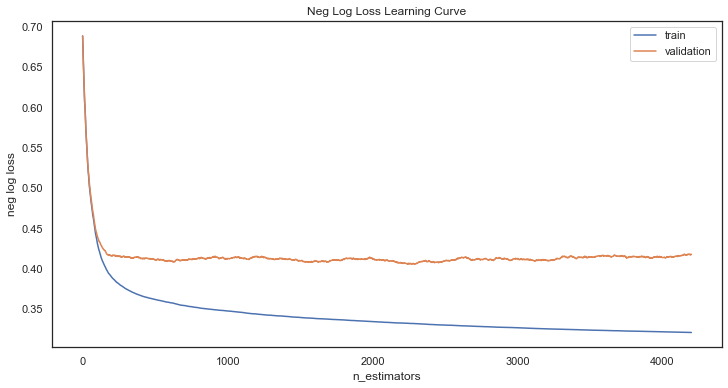

In [59]:
# XGBoosting
XGB = XGBClassifier(n_estimators=4200, eta=0.018, subsample=0.5, colsample_bytree=0.5)

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_val,y_val)]
XGB.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset, verbose=False)
Y_pred = XGB.predict(X_val)
# retrieve performance metrics
results = XGB.evals_result()
# plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='validation')
plt.xlabel("n_estimators")
plt.ylabel("neg log loss" )
plt.title("Neg Log Loss Learning Curve")
plt.legend()
plt.show()

# Running fits the XGBoost model, retrieves the calculated metrics, and plots learning curves.
# Can experiment with Hyperparamaters and see impact on curve! 

acc_xgb = round(XGB.score(X_train, y_train) * 100, 2)
acc_xgb_val = round(XGB.score(X_val, y_val) * 100, 2)

### Log loss learning curve plot
The learning objective is logistic regression for binary classification and the evaluation metric is the negative log loss. The training and validation data are both plotted. The training data continues to improve with a decrease in the neg log loss value. Plot shows training curve decreasing, but validation curve flattens at about 150 iterations indicating potential overfitting considering training data beyond this point. 

### Hyperparameter Tuning
The Optuna hyperparameter framework was used to identify potential hyperparamenter settings for the XGB model. Using the suggested values did not improve the performance obtained by manual adjustment of the four settings used that were discovered by adjustments suggested by the log loss curve. Selected settings are shown in the XGB classifier statement.

In [74]:
print(dash)
print('XGB Confusion Matrix')
print(dash)
print(confusion_matrix(y_val,Y_pred))
print(classification_report(y_val,Y_pred))
print(dash)

print("XGB Accuracy score (training): ", acc_xgb)
print("XGB Accuracy score (validation): ", acc_xgb_val)

# print("XGB Accuracy score (training): {0:.3f}".format(xgb.score(X_train, y_train)))
# print("XGB Accuracy score (validation): {0:.3f}".format(xgb.score(X_val, y_val)))

# print('GBM Accuracy Score')
# print(round((accuracy_score(y_val, Y_pred)*100),2))

-----------------
XGB Confusion Matrix
-----------------
[[100  10]
 [ 19  50]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

-----------------
XGB Accuracy score (training):  86.38
XGB Accuracy score (validation):  83.8


In [62]:
cv_results = cross_validate(XGB,
                                    X,
                                    y,
                                    cv = 5,
                                    n_jobs = -1)
print(cv_results['test_score'].mean())

0.819327098110602


### AdaBoost
Adaboost, short for Adaptive Boosting, is a statistical classification meta-algorithm.It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.

Every learning algorithm tends to suit some problem types better than others, and typically has many different parameters and configurations to adjust before it achieves optimal performance on a dataset. AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier.[1][2] When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative 'hardness' of each training sample is fed into the tree growing algorithm such that later trees tend to focus on harder-to-classify examples.

In [67]:
# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
# Y_pred_ada = adaboost.predict(X_test)

acc_adaboost = round(adaboost.score(X_train, y_train)*100, 4)
acc_adaboost_val = round(adaboost.score(X_val, y_val)*100, 4)
print("acc adaboost =", acc_adaboost)

acc adaboost = 82.4438


<h1>ML Model Comparisons</h1><a id='prep_ml'></a>

 - Models sorted by their training data single accuracy scores.


In [69]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'GBM', 'XGB', 'AdaBoost'],
    'Training Score': [acc_log, acc_knn, acc_random_forest, acc_gbm, acc_xgb, acc_adaboost],
    'Validation Score': [acc_log_val, acc_knn_val, acc_random_forest_val, acc_gbm_val, acc_xgb_val, acc_adaboost_val]})

models.sort_values(by='Training Score', ascending=False)

,Model,Training Score,Validation Score
2,Random Forest,86.8000,82.6800
4,XGB,86.3800,83.8000
1,KNN,85.1100,81.5600
3,GBM,83.2900,80.4500
5,AdaBoost,82.4438,78.2123
0,Logistic Regression,81.3200,78.2100


## Generate and Plot ROC Curves for Comparison

In [75]:
# The logistic regression model
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict_proba(X_val)[:, 1]
fpr_lm, tpr_lm, _ = roc_curve(y_val, y_pred_lm)

# The KNN model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict_proba(X_val)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_pred_knn)

# The Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf)

# GradientBoostingClassifier() 
gbm = GradientBoostingClassifier(n_estimators=10)
model = GradientBoostingClassifier(n_estimators=10) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict_proba(X_val)[:, 1]
fpr_gbm, tpr_gbm, _ = roc_curve(y_val, y_pred_gbm)

# The XGB model
xgb = XGBClassifier(n_estimators=5000, eta=0.02, subsample=0.5, colsample_bytree=0.5)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict_proba(X_val)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred_xgb)

# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict_proba(X_val)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_val, y_pred_ada)


[11:11:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### ROC Results

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers. It was first used in signal detection theory but is now used in many other areas such as medicine, radiology, natural hazards and machine learning. The ROC curve is the plot between the True Positive rate and the False positive rate (aka Sensitivity) and the (1-Specificity). Note that the ROC does not depend on the class distribution. This makes it useful for evaluating classifiers predicting rare events such as diseases or disasters.  

To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve (AUC). It is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.

The ROC plot shows Random Forest and Extreme Gradient Boosting, XGB, relatively better at the 0.1 false positive rate.

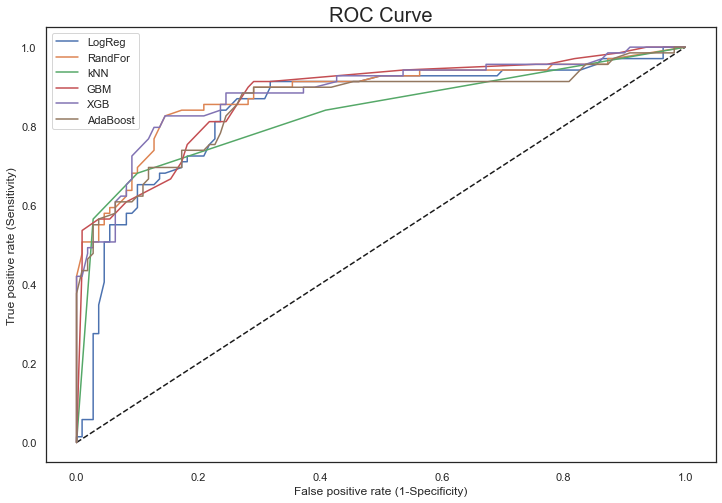

In [76]:
plt.subplots(figsize=(12,8))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LogReg')
plt.plot(fpr_rf, tpr_rf, label='RandFor')
# plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_knn, tpr_knn, label='kNN')
# plt.plot(fpr_sgd, tpr_sgd, label='SGD')
plt.plot(fpr_gbm, tpr_gbm, label='GBM')

plt.plot(fpr_xgb, tpr_xgb, label='XGB')

plt.plot(fpr_ada, tpr_ada, label='AdaBoost')

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.title('ROC Curve', fontsize=20)
plt.legend(loc='best')
plt.show()

<h1>ROC and K-Fold CV Model Comparison Results</h1><a id='ml_models'></a>


### K-fold cross-validation Mean Accuracy
The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held-back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.

 - Below is a function that applies K-fold CV for each of the models. It takes full train data and target, list of estimators and list of labels(names of estimators), cross validation splitting strategy, returning a dataframe with results of the tests. The fit time is also provided and you can see the significant relative additional time for the Extreme Gradient Boosting method to complete. 

In [73]:
def test_estimators(X, y, estimators, labels, cv):
    result_table = pd.DataFrame()
    
    row_index = 0
    for est, label in zip(estimators, labels):

        est_name = label
        result_table.loc[row_index, 'Model Name'] = est_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv = cv,
                                    n_jobs = -1)

        result_table.loc[row_index, 'CV Mean Accuracy'] = cv_results['test_score'].mean()
        result_table.loc[row_index, 'CV Std'] = cv_results['test_score'].std()
        result_table.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()

        row_index += 1

    result_table.sort_values(by=['CV Mean Accuracy'], ascending = False, inplace = True)

    return result_table

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 3)
rf = RandomForestClassifier(random_state = 1)
gbm = GradientBoostingClassifier(n_estimators=20, random_state=0)
xgb = XGBClassifier(n_estimators=4200, eta=0.018, early_stopping_rounds=50, subsample=0.5, colsample_bytree=0.5)
ada = AdaBoostClassifier()

estimators = [lr,
              knn,
              rf,
              gbm,
              xgb,
              ada,
              ]

labels = ['Log Regression',
          'kNN',
          'Random Forest',
          'Gradient Boosting', 
          'Extreme Gradient Boosting',
          'AdaBoost',]

results = test_estimators(X, y, estimators, labels, cv = 10)
results.style.background_gradient(cmap = 'Blues')


,Model Name,CV Mean Accuracy,CV Std,Fit Time
4,Extreme Gradient Boosting,0.817129,0.043133,18.296919
2,Random Forest,0.809276,0.045640,0.131766
3,Gradient Boosting,0.809226,0.034667,0.016544
0,Log Regression,0.805855,0.032061,0.010419
5,AdaBoost,0.803633,0.030340,0.083457
1,kNN,0.802584,0.050853,0.002647


### Potential follow up
 - Compare model results for before / after applied feature engineering datasets.
 - How do results of normalized dataset compare to implemented feature engineering dataset. (Preliminary results indicate feature engineering dataset, with added created fields, make models slightly more accurate). 
 - Check alternative imputing options for NAs.  
 - Review One Hot Encoding for mapping changes for Categorical fields (e.g. Sex, Embarked) 
 - Perform alternative Hyperparameter Tuning for the models. Optuna used for XGB, suggested values ending up in a decrease in accuracy. Parameters were adjusted based on review of the Log Loss curves above for the XGB model.    

## Inspirations Below:

Sabarish Sridhar - https://www.kaggle.com/dudewhat/titanic-with-random-forest-top-7

Manav Sehgal - https://www.kaggle.com/startupsci/titanic-data-science-solutions

Jason Brownlee - https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/
    
sklearn - https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-download-auto-examples-ensemble-plot-feature-transformation-py
    
TowardsDataScience - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    
Error - https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/?utm_source=blog&utm_medium=decision-tree-vs-random-forest-algorithm

ROC - https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/    